# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'tensorflow'

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [ ]:
data = image_dataset_from_directory(
    "./data",  # replace with the actual path
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

Found 1658 files belonging to 4 classes.
Using 1327 files for training.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

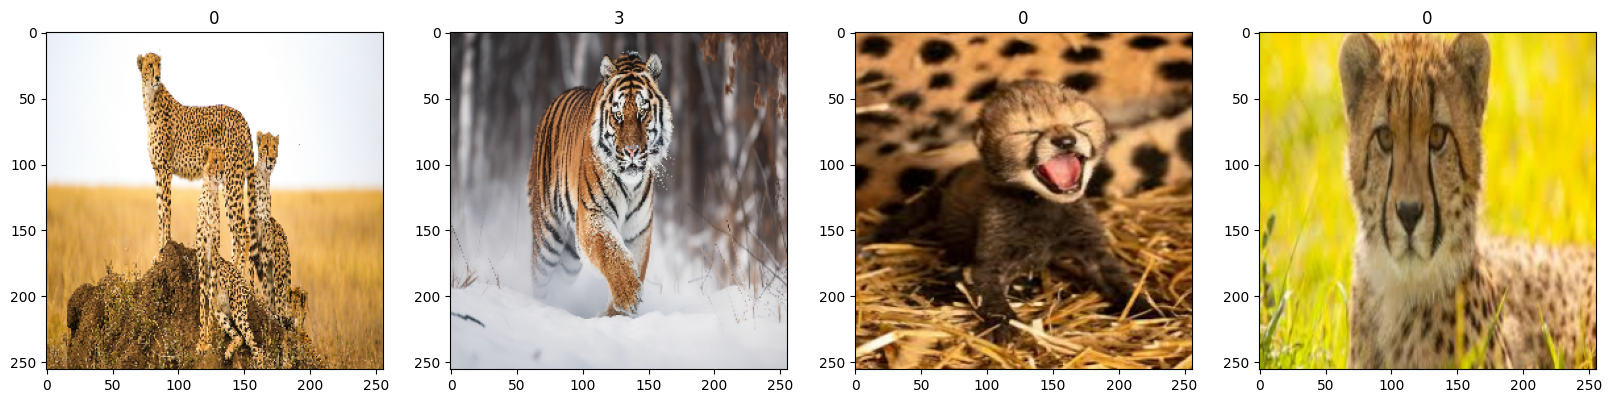

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [ ]:
data = data.map(lambda x, y: (x / 255.0, y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [ ]:
#Your code here
# Calculate the number of batches
data_size = data.cardinality().numpy()

# Define the proportions for training, testing, and validation sets
train_size = int(0.7 * data_size)
val_size = int(0.15 * data_size)
test_size = data_size - train_size - val_size

# Split the dataset
train_data = data.take(train_size)
remaining_data = data.skip(train_size)
val_data = remaining_data.take(val_size)
test_data = remaining_data.skip(val_size)

# Verify the splits
print(f'Total data size: {data_size}')
print(f'Training set size: {train_size}')
print(f'Validation set size: {val_size}')
print(f'Test set size: {test_size}')

# Example usage: Create a numpy iterator for the training data
train_data_iterator = train_data.as_numpy_iterator()
train_batch = train_data_iterator.next()

Total data size: 42
Training set size: 29
Validation set size: 6
Test set size: 7


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [ ]:
def create_cnn_model(input_shape=(256, 256, 3), num_classes=4):
    model = models.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=input_shape))

    # Convolutional layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the feature maps
    model.add(layers.Flatten())

    # Fully connected layer 1
    model.add(layers.Dense(128, activation='relu'))

    # Fully connected layer 2
    model.add(layers.Dense(64, activation='relu'))

    # Output layer with softmax activation
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
model = create_cnn_model()



**Q.6** Compile your model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape     ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)      │ (None, 254, 254, │       896 │
│                        │ 32)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ max_pooling2d_3        │ (None, 127, 127, │         0 │
│ (MaxPooling2D)         │ 32)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ conv2d_4 (Conv2D)      │ (None, 125, 125, │    18,496 │
│                        │ 64)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ max_pooling2d_4        │ (None, 62, 62,   │         0 │
│ (MaxPooling2D)         │ 64)              │           │
├────────────────────────┼──────────────────┼───────────┤
│ conv2d_5 (Conv2D)      │ (None, 60, 60,   │    73,856 │
│                        │ 128)             │           │
├────────────────────────┼──────────────────┼───────────┤
│ max_pooling2d_5        │ (None, 30, 30,   │         0 │
│ (MaxPooling2D)         │ 128)             │           │
├────────────────────────┼──────────────────┼───────────┤
│ flatten_1 (Flatten)    │ (None, 115200)   │         0 │
├────────────────────────┼──────────────────┼───────────┤
│ dense_3 (Dense)        │ (None, 128)      │ 14,745,7… │
├────────────────────────┼──────────────────┼───────────┤
│ dense_4 (Dense)        │ (None, 64)       │     8,256 │
├────────────────────────┼──────────────────┼───────────┤
│ dense_5 (Dense)        │ (None, 4)        │       260 │
└────────────────────────┴──────────────────┴───────────┘

 Total params: 14,847,492 (56.64 MB)

 Trainable params: 14,847,492 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [ ]:
history = model.fit(train_data, 
                    validation_data=val_data, 
                    epochs=10)  # Use 10-15 epochs


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.2537 - loss: 1.5972 - val_accuracy: 0.3802 - val_loss: 1.2877
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4267 - loss: 1.2810 - val_accuracy: 0.5260 - val_loss: 1.0543
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5448 - loss: 1.0519 - val_accuracy: 0.5365 - val_loss: 0.9751
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.6607 - loss: 0.7881 - val_accuracy: 0.7917 - val_loss: 0.6638
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8370 - loss: 0.4198 - val_accuracy: 0.7188 - val_loss: 0.7744
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9023 - loss: 0.2634 - val_accuracy: 0.8021 - val_loss: 0.7157
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9464 - loss: 0.2147 - val_accuracy: 0.7917 - val_loss: 0.8792
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9538 - loss: 0.1408 - val_accuracy: 0.8229 - val_loss:

**Q.8** Test your code with test set

In [ ]:
loss,accuracy=model.evaluate(test_data)

In [ ]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**